Papers on uniform approximation theorem for RNN assumes that the RNN is recursion of the form $z_{k+1} = s(A z_k +B u_k +b)$, where $z$ is a state vector, $u$ is an external input vector, and $s$ is an activation function applied in each coordinate. Provide a sample code how to build and train such network in keras on a simple example data.

2023-12-30 13:53:58.564248: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-30 13:54:02.921531: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


16/16 [==============================] - 0s 2ms/step


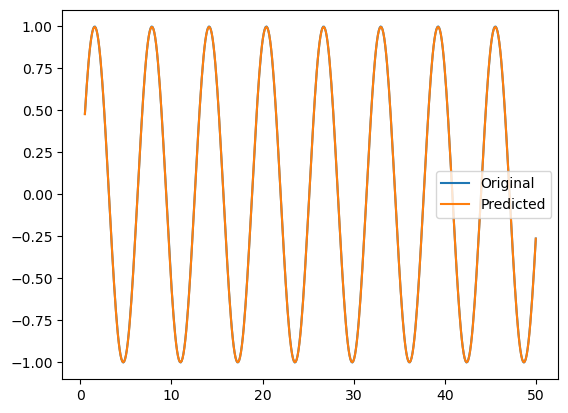

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt

# Generating sine wave data
t = np.linspace(0, 50, 500)
data = np.sin(t)

# Preparing dataset
def prepare_data(data, steps):
    X, y = [], []
    for i in range(len(data) - steps):
        X.append(data[i:i+steps])
        y.append(data[i+steps])
    return np.array(X), np.array(y)

steps = 5
X, y = prepare_data(data, steps)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Building the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, activation='tanh', input_shape=(steps, 1)))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=100, batch_size=32, verbose=0)

# Predictions for visualization
predictions = model.predict(X)

# Plotting
plt.plot(t[steps:], data[steps:], label='Original')
plt.plot(t[steps:], predictions.ravel(), label='Predicted')
plt.legend()
plt.show()


This code does the following:

* Generates a sine wave dataset.
* Prepares the data for training by creating sequences (of a defined number of steps) as input and the next value in the sequence as the target.
* Defines an RNN model with the SimpleRNN layer in Keras. The network uses tanh as the activation function.
* Compiles the model using the Adam optimizer and mean squared error as the loss function.
* Trains the model on the prepared data.
* Predicts the sine wave values using the trained model and plots the original data against the predictions for visual comparison.

This example provides a basic understanding of building and training an RNN with Keras. You can modify the architecture, add more layers, or change hyperparameters to suit your specific problem.

Provide a code to get the matrices A and B from this network and reproduce model.predict() in plain python code.

To extract the matrices AA and BB from the trained RNN model and reproduce the model.predict() function in plain Python, you need to understand how RNNs are structured in Keras. In a SimpleRNN layer, the weights are organized as follows:

* The kernel (weights for the input, equivalent to your B) is accessible via layer.get_weights()[0].
* The recurrent kernel (weights for the state, equivalent to your A) is accessible via layer.get_weights()[1].
* The bias vector (equivalent to your bb) is accessible via layer.get_weights()[2].

First, let's extract these weights:

In [2]:
# Assuming model is the trained Keras model
rnn_layer = model.layers[0]  # SimpleRNN layer

A, B, b = rnn_layer.get_weights()

In [6]:
print('A.shape=',A.shape)
print('B.shape=',B.shape)
print('b.shape=',b.shape)

A.shape= (1, 50)
B.shape= (50, 50)
b.shape= (50,)


In [7]:
def tanh(x):
    return np.tanh(x)

def rnn_predict(X, A, B, b, dense_weights):
    """
    Reproduce Keras model prediction in plain Python.
    X: Input data (num_samples, num_timesteps, num_features)
    A: Recurrent kernel weights
    B: Input kernel weights
    b: Bias
    dense_weights: Weights and biases from the Dense layer
    """
    num_samples, num_timesteps, num_features = X.shape
    n_units = A.shape[0]  # Number of units in the RNN layer
    outputs = []

    for sample in X:
        h = np.zeros(n_units)  # Initial state for each sample
        for t in range(num_timesteps):
            x_t = sample[t]  # Input at time step t
            h = tanh(np.dot(h, A) + np.dot(x_t, B) + b)
        y = np.dot(h, dense_weights[0]) + dense_weights[1]  # Dense layer transformation
        outputs.append(y)

    return np.array(outputs)

# Use the revised function for prediction
manual_predictions = rnn_predict(X, A, B, b, dense_weights)
manual_predictions = manual_predictions.reshape(-1)


ValueError: shapes (1,) and (50,50) not aligned: 1 (dim 0) != 50 (dim 0)